<span style="color:Gray"><i>Exercise 27</i></span>
18:00

# Artificial Intelligence w Marketingu Bankowym – Logistic regression model part 2

Marketing bankowy – działalność podmiotów gospodarczych mającą na celu poznanie i dostosowanie się do potrzeb rynku oraz oddziaływanie na popyt i podaż, uwzględniając wymagania i preferencje finalnych nabywców.

Zatem koncepcja marketingu oznacza, że punktem wyjścia działalności podmiotów gospodarczych, są potrzeby i wymagania ostatecznych odbiorców, jak również dostosowanie się do zmiennych warunków rynkowych i wywieraniu wpływu na rynek dla osiągnięcia swoich celów.

Marketing bankowy to system zintegrowanych działań banku dostępnymi instrumentami w celu dostosowania się do potrzeb rynku, zaspokojenia tych potrzeb swoimi produktami, kreowania popytu na te produkty, a także poszukiwania nowych rynków lub nisz rynkowych oraz kształtowania i utrwalania pozytywnego wizerunku banku w społeczeństwie.
źródło: https://pl.wikipedia.org/wiki/Marketing_bankowy

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Imputer

import matplotlib.pyplot as plote

%matplotlib inline

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('c:/1/bank.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,1,53,technician,married,unknown,no,no,no,cellular,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,2,28,management,single,university.degree,no,yes,no,cellular,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,3,3,39,services,married,high.school,no,no,no,cellular,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,4,4,55,retired,married,basic.4y,no,yes,no,cellular,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


#  <span style="color:darkRED"> Jak w praktyce zastosować model Linear Regression w marketingu bankowym?
</span>

Departament marketingu bankowego niedawno przeprowadził akcję promocyjną. Klienci byli zachęcani do skorzystania z oferty banku - zaciągania kredytów w rachunku bieżącym. Cała operacja została skrupulatnie odnotowana w formie tabeli danych. Tabelę danych można znaleźć pod adresem:  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

### Dane klienta banku

<span style="color:green"><b>age:</b></span> (numerycznie)

<span style="color:green"><b>job:</b></span> rodzaj pracy (kategorycznie: „admin.”, „Pracownik fizyczny”, „przedsiębiorca”, „pokojówka”, „zarządzanie”, „emerytowany”, „samozatrudniony”, „ usługi ”,„ student ”,„ technik ”,„ bezrobotny ”,„ nieznany ”)

<span style="color:green"><b> marital:</b></span> stan cywilny (kategorycznie:„ rozwiedziony ”,„ żonaty ”,„ samotny ”,„ nieznany ”; uwaga:„ rozwiedziony ”oznacza rozwiedziony lub owdowiały)

<span style="color:green"><b> education: </b></span>(kategoryczne: „podstawowy. 4 lata”, „podstawowy. 6 lat”, „podstawowy. 9 lat”, „szkoła średnia”, „analfabeta”, „kurs zawodowy”, „uniwersytet. stopień”, „nieznane”)

<span style="color:green"><b> default:</b></span> czy kredyt jest niespłacony? (kategorycznie: „nie”, „tak”, „nieznany”)

<span style="color:green"><b> housing:</b></span> ma kredyt mieszkaniowy? (kategorycznie: „nie”, „tak”, „nieznany”) 

<span style="color:green"><b> loan:</b> </span>czy pożyczka osobista? (kategorycznie: „nie”, „tak”, „nieznany”)
Powiązane z ostatnim kontaktem bieżącej kampanii

<span style="color:green"><b> contact:</b></span> typ komunikacji kontaktowej (kategorycznie: „komórkowy”, „telefon”)

<span style="color:green"><b> month:</b></span>ostatni miesiąc kontaktowy w roku (kategorycznie: „jan”, „lut”, „mar”, ..., „lis”, „dec”)

<span style="color:green"><b> day_of_week:</b></span> ostatni dzień tygodnia w tygodniu (kategorycznie: „pon”, „wt”, „środ”, „czw”, „pt”)

<span style="color:green"><b> duration: </b></span>czas trwania ostatniego kontaktu, w sekundach (numerycznie) . Ważna uwaga: ten atrybut ma duży wpływ na docelowy wynik (np. Jeśli czas trwania = 0, to y = „nie”). Jednak czas trwania nie jest znany przed wykonaniem połączenia. Ponadto po zakończeniu połączenia y jest oczywiście znane. W związku z tym dane te należy uwzględnić wyłącznie do celów porównawczych i należy je odrzucić, jeżeli intencją jest stworzenie realistycznego modelu predykcyjnego.
Inne atrybuty

<span style="color:green"><b> campaign:</b></span> liczba kontaktów wykonanych podczas tej kampanii i dla tego klienta (numerycznie, obejmuje ostatni kontakt)

<span style="color:green"><b> pdays:</b></span> liczba dni, które upłynęły od ostatniego kontaktu klienta z poprzedniej kampanii (numerycznie; 999 oznacza, że klient nie był wcześniej skontaktowano się)

<span style="color:green"><b> previous:</b></span> liczba kontaktów wykonanych przed tą kampanią i dla tego klienta (numerycznie)

<span style="color:green"><b> poutcome:</b></span>wynik poprzedniej kampanii marketingowej (kategorycznie: „porażka”, „nieistniejąca”, „sukces”)
Atrybuty kontekstu społecznego i gospodarczego

<span style="color:green"><b> emp.var.rate: </b></span>wskaźnik zmienności zatrudnienia - wskaźnik kwartalny (liczbowy)

<span style="color:green"><b> Cons.price.idx: </b></span>wskaźnik cen konsumpcyjnych - wskaźnik miesięczny (liczbowy)

<span style="color:green"><b> cons.conf.idx: </b></span>wskaźnik zaufania konsumentów - wskaźnik miesięczny (liczbowy )

<span style="color:green"><b> euribor3 mln: </b></span>stawka 3-miesięczna euribor - wskaźnik dzienny (liczbowy)

<span style="color:green"><b> nr_employed: </b></span>liczba zatrudnionych: liczba pracowników - wskaźnik kwartalny (liczbowy)

Poprzednią analize Marketingu Bankowego, można znaleźć pod adresem: 
http://sigmaquality.pl/machine-learning/artificial-intelligence-w-marketingu-bankowym 

Kierownik Marketingu Bankowego dowiedział się z niej, jakie grupy klientów są najbardziej przewidywalne oraz które zmienne wpływają na decyzję klientów. Dowiedział się również, jakie znaczenie mają określone techniki operacyjne takie jak średni czas rozmowy i liczba kontaktów z klientem. Jak ważny jest czas między kolejnymi kontaktami, czego unikać a o czym rozmawiać z klientami. Te informacje pozwolą kierownikowi podnieść efektywność sprzedaży w kolejnych kampaniach promocyjnych. 

Przyjmijmy, że dane zamieszczone pod powyższym adresem  (https://archive.ics.uci.edu/ml/machine-learning-databases/00222/) są danymi historycznymi banku z poprzednich akcji promocyjnych. Teraz Kierownik Marketingu Bankowego ma listą 150 nowych klientów banku. Kierownik chce wiedzieć, którzy klienci, na podstawie historii poprzednich akcji promocyjnych, najprawdopodobniej wezmą kredyt. 
Kierownik dysponując określonymi zasobami ludzkimi i czasem, chce więc skoncentrować swoje wysiłki na określonych, wskazanych przez algorytm artificial intelligence klientach. Dzięki temu ma nadzieję na poprawę efektywności sprzedaży banku. 

Ponieważ nie posiadamy listy 150 nowych klientów, wydzielimy 150 przypadkowych rekordów z bazy UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/ml/machine-learning-databases/00222/)



<span style="color:darkblue"> Wydzielam listę 150 nowych klientó banku</span>

In [3]:
df = pd.read_csv('c:/1/bank.csv')
df3 = df.sample(150)

In [4]:
df3.shape

(150, 23)

Niestety nie można wykorzystać modeli z poprzedniej analizy ponieważ zawiera on zmienne, których nie potrafimy przewidzieć w przyszłości.
Nie wiemy jaki będzie czas kontaktu. Nie wiemy ile będzie rozmów konsultant banku z klientem ponieważ to zwykle klient decyduje jak długo i ile razy chce rozmawiać. 


<span style="color:green"> duration: </span>czas trwania ostatniego kontaktu, w sekundach (numerycznie) . Ważna uwaga: ten atrybut ma duży wpływ na docelowy wynik (np. Jeśli czas trwania = 0, to y = „nie”). Jednak czas trwania nie jest znany przed wykonaniem połączenia. Ponadto po zakończeniu połączenia y jest oczywiście znane. W związku z tym dane te należy uwzględnić wyłącznie do celów porównawczych i należy je odrzucić, jeżeli intencją jest stworzenie realistycznego modelu predykcyjnego.

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,1,53,technician,married,unknown,no,no,no,cellular,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,2,28,management,single,university.degree,no,yes,no,cellular,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,3,3,39,services,married,high.school,no,no,no,cellular,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,4,4,55,retired,married,basic.4y,no,yes,no,cellular,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


Musimy z pierwotnej bazy wykasować kilka kolumn:

<span style="color:blue">Usuwam kolumny: 'day_of_week','month','previous','campaign','duration', 'contact', 'y'</span>

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'age', 'job', 'marital', 'education',
       'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [7]:
df2 = df[['age', 'job', 'marital', 'education','default', 'housing', 'loan', 'poutcome', 'emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed','y']]

Podobny zabieg trzeba wykonać dla zbioru 'kierownika marketingu', listy nowych 150 klientów oznaczonej jako df3, wycinamy te same, nieznane w przyszłości zmienne egzogeniczne. Tym razem jednak musimy też wyciąć zmienną wynikową y ponieważ nie wiemy, czy kredyt zostanie sprzedany.

In [8]:
df3 = df3[['age', 'job', 'marital', 'education','default', 'housing', 'loan', 'poutcome', 'emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']]

In [9]:
df2.head(5)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Tworzenie Dummy Variables
Wybieram kolumny tekstowe, dyskretne, do głębszej analizy.

<span style="color:blue">Wyświetlamy kolumny zmiennnych dyskretnych</span>

In [10]:
df2.describe(include=["object"]).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'poutcome'],
      dtype='object')

In [11]:
list = ['job', 'marital', 'education', 'default', 'housing', 'loan','poutcome']

<span style="color:blue">Transforumjemy na dane dummy variables</span>

In [12]:
df2[list] = df2[list].apply(LabelEncoder().fit_transform)
df2[list].head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,job,marital,education,default,housing,loan,poutcome
0,1,1,0,1,2,0,1
1,9,1,7,0,0,0,1
2,4,2,6,0,2,0,2
3,7,1,3,0,0,0,1
4,5,1,0,0,2,0,2


<span style="color:blue">Dzielimy nowy zbiór df2 na zmienne opisujące i zmienną wynikową.</span>

In [13]:
y = df2['y']
X = df2.drop('y', axis=1) 

<span style="color:blue">Dzielimy zbiór df2 na zbiór testowy i zbiór treningowy.</span>

In [14]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

# <span style="color:blue">OVERSAMPLING </span>

Dla nowego zbioru df2 bo zmienna wynikowa nie jest zbilansowana. Oversampling robimy na zmiennych treningowych.

In [15]:
df2.y.value_counts(dropna = False, normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [16]:
Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
Proporcja = np.round(Proporcja, decimals=0)
Proporcja = Proporcja.astype(int)
print('Ile na jedną sybskrypcje przypada nieprzedłużonych subskrypcji:',Proporcja)

Ile na jedną sybskrypcje przypada nieprzedłużonych subskrypcji: 8


<span style="color:blue">Replikacja zmiennych wynikowych w zbiorze treningowym</span>

In [17]:
ytrain_pos_OVS = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
print('Ilość zmiennych wynikowych y  w zbiorze treningowym df2 po replikacji:' ,ytrain_pos_OVS.count())

Ilość zmiennych wynikowych y  w zbiorze treningowym df2 po replikacji: 24872


<span style="color:blue">Replikacja zmiennych niezależnych w zbiorze treningowym</span>

In [18]:
Xtrain_pos_OVS = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)

In [19]:
ytrain_pos_OVS = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
print('Ilość zmiennych niezależnychX  z zbiorze treningowym df2 po replikacji:' ,Xtrain_pos_OVS.count())

Ilość zmiennych niezależnychX  z zbiorze treningowym df2 po replikacji: age               24872
job               24872
marital           24872
education         24872
default           24872
housing           24872
loan              24872
poutcome          24872
emp_var_rate      24872
cons_price_idx    24872
cons_conf_idx     24872
euribor3m         24872
nr_employed       24872
dtype: int64


<span style="color:blue">Wprowadzenie nowych, zreplikowanych zmiennych do zbioru treningowego</span>

In [20]:
ytrain_OVS = pd.concat([ytrain, ytrain_pos_OVS], axis = 0).reset_index(drop = True)
Xtrain_OVS = pd.concat([Xtrain, Xtrain_pos_OVS], axis = 0).reset_index(drop = True)

<span style="color:blue">Sprawdzenie ilość wierszy w zbiorach przed i po oversampling</span>

In [21]:
print ('Zbiór X treningowy: ',Xtrain.shape)
print ('Zbiór X testowy:    ', Xtest.shape)
print ('Zbiór y treningowy: ', ytrain.shape)
print ('Zbiór y testowy:    ', ytest.shape)

Zbiór X treningowy:  (27595, 13)
Zbiór X testowy:     (13593, 13)
Zbiór y treningowy:  (27595,)
Zbiór y testowy:     (13593,)


In [22]:
Xtrain_OVS.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,49,1,1,2,1,0,0,1,1.4,94.465,-41.8,4.959,5228.1
1,38,9,0,6,1,0,0,1,1.4,93.444,-36.1,4.963,5228.1
2,42,0,0,6,0,0,0,1,1.4,94.465,-41.8,4.959,5228.1


# Logistic Regression na zbiorze df2

In [23]:
import numpy as np
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = 5, cv=2)

LR_Grid.fit(Xtrain_OVS, ytrain_OVS)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=True),
             iid='warn', n_jobs=5,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

<span style="color:blue">Podstawienie do wzoru</span>

In [24]:
ypred_OVS = LR_Grid.predict(Xtest)

<span style="color:blue">Blok diagnostyczny</span>

Recall Training data:      0.6845
Precision Training data:   0.7733
----------------------------------------------------------------------
Recall Test data:          0.6839
Precision Test data:       0.267
----------------------------------------------------------------------
Confusion Matrix Test data
[[9187 2875]
 [ 484 1047]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     12062
           1       0.27      0.68      0.38      1531

    accuracy                           0.75     13593
   macro avg       0.61      0.72      0.61     13593
weighted avg       0.87      0.75      0.79     13593



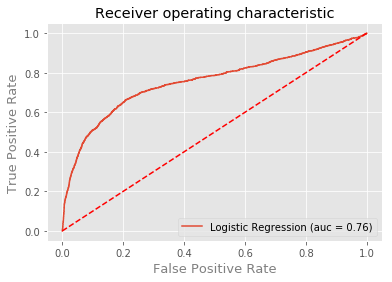

In [25]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(ytrain_OVS, LR_Grid.predict(Xtrain_OVS)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain_OVS, LR_Grid.predict(Xtrain_OVS)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, LR_Grid.predict(Xtest)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, LR_Grid.predict(Xtest)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, LR_Grid.predict(Xtest)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, LR_Grid.predict(Xtest)))
y_pred_proba = LR_Grid.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

Model wyszedł raczej słaby - teraz nie będziemy polepszać modelu, lecz skoncentrujemy się na tym jak zastosować go w praktyce. Mamy zbiór 150 nowych klientów w zbiorze df3. Kierownik departamentu Marketingu Bankowego, powinien wiedzieć, na których klientach powinien skoncentrować swoje wysiłki. Którzy klienci mogą wziąć kredyty a którzy raczej go nie wezmą. Zlikwidowaliśmy zmienne, które można otrzymać po przeprowadzonej akcji takie jak czas trwania rozmów z klientem oraz ilość kontaktów. Stworzyliśmy więc nowy model nie zawierający nieznanych w przyszłości parametrów. Model jest słabszy od modelu z pełnymi danymi lecz wciąż jest on względnie dobry.

<span style="color:blue">Podstawiamy dane do modelu</span>

In [26]:
df3.head()

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
18410,32,housemaid,married,basic.4y,no,no,no,nonexistent,1.4,93.444,-36.1,4.963,5228.1
9709,43,housemaid,married,basic.4y,no,yes,no,nonexistent,1.4,93.918,-42.7,4.962,5228.1
33662,36,admin.,married,high.school,no,no,no,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
35632,46,self-employed,single,high.school,no,no,no,nonexistent,1.4,94.465,-41.8,4.967,5228.1
16438,35,admin.,married,university.degree,no,no,no,nonexistent,-3.0,92.713,-33.0,0.707,5023.5


In [27]:
df3.shape

(150, 13)

Zróbmy kopie df3 aby zrobić na niej Dummy Variables

In [28]:
df3dummy = df3.copy()

In [29]:
df3dummy.head()

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
18410,32,housemaid,married,basic.4y,no,no,no,nonexistent,1.4,93.444,-36.1,4.963,5228.1
9709,43,housemaid,married,basic.4y,no,yes,no,nonexistent,1.4,93.918,-42.7,4.962,5228.1
33662,36,admin.,married,high.school,no,no,no,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
35632,46,self-employed,single,high.school,no,no,no,nonexistent,1.4,94.465,-41.8,4.967,5228.1
16438,35,admin.,married,university.degree,no,no,no,nonexistent,-3.0,92.713,-33.0,0.707,5023.5


<span style="color:blue">Transforumjemy dane tekstowe na dane dummy variables</span>

# <span style="color:blue"> Dummy Variables</span>
Mamy zwykły zbiór danych kierownika marketingu, musimy go przerobić na Dummy Variables aby logistic Regression mógł dokonać predykcji.

<span style="color:blue">Wyświetlamy kolumny zmiennnych dyskretnych</span>

In [30]:
df3dummy.describe(include=["object"]).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'poutcome'],
      dtype='object')

In [31]:
list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

In [32]:
df3dummy[list] = df3dummy[list].apply(LabelEncoder().fit_transform)
df3dummy[list].head()

,job,marital,education,default,housing,loan,poutcome
18410,3,1,0,0,0,0,1
9709,3,1,0,0,2,0,1
33662,0,1,3,0,0,0,1
35632,6,2,3,0,0,0,1
16438,0,1,5,0,0,0,1


In [33]:
df3dummy.head(4)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
18410,32,3,1,0,0,0,0,1,1.4,93.444,-36.1,4.963,5228.1
9709,43,3,1,0,0,2,0,1,1.4,93.918,-42.7,4.962,5228.1
33662,36,0,1,3,0,0,0,1,-1.8,93.075,-47.1,1.405,5099.1
35632,46,6,2,3,0,0,0,1,1.4,94.465,-41.8,4.967,5228.1


<span style="color:blue">Podstawienie do wzoru</span>

In [34]:
ypred_OVS3 = LR_Grid.predict(df3dummy)

In [35]:
ypred_OVS3.shape

(150,)

In [36]:
df3['Wynik'] = ypred_OVS3

<span style="color:blue">Tworzenie listy dla kierownika marketingu</span>

In [37]:
print('Lista kierownika marketingu bankowego')
df3[df3['Wynik']==1]

Lista kierownika marketingu bankowego


,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Wynik
33662,36,admin.,married,high.school,no,no,no,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,1
16438,35,admin.,married,university.degree,no,no,no,nonexistent,-3.0,92.713,-33.0,0.707,5023.5,1
28829,34,technician,single,professional.course,no,no,no,failure,-1.8,92.893,-46.2,1.344,5099.1,1
14992,36,blue-collar,married,basic.9y,no,yes,no,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,1
17011,28,blue-collar,married,basic.6y,unknown,yes,no,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,1
28238,48,admin.,single,university.degree,no,yes,no,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,1
4395,32,self-employed,single,university.degree,no,yes,no,failure,-1.8,92.893,-46.2,1.299,5099.1,1
39621,36,admin.,single,university.degree,no,yes,no,failure,-1.8,92.893,-46.2,1.291,5099.1,1
13531,54,admin.,divorced,university.degree,no,yes,no,failure,-1.1,94.199,-37.5,0.878,4963.6,1
21417,56,retired,married,university.degree,no,yes,no,success,-3.4,92.649,-30.1,0.716,5017.5,1


<span style="color:blue">Statystyka </span>

In [38]:
df3['Wynik'].value_counts(normalize=True)

0    0.68
1    0.32
Name: Wynik, dtype: float64

In [39]:
df3.pivot_table(index = 'job', columns='Wynik', values='age', aggfunc='count', margins=True, margins_name='RAZEM')

Wynik,0,1,RAZEM
job,,,
admin.,23.0,16.0,39
blue-collar,21.0,7.0,28
entrepreneur,3.0,3.0,6
housemaid,6.0,2.0,8
management,11.0,NaN,11
retired,3.0,8.0,11
self-employed,6.0,2.0,8
services,9.0,5.0,14
technician,18.0,5.0,23


In [40]:
df3.pivot_table(index = ['marital'], columns='Wynik', values='age', aggfunc='count', margins=True, margins_name='RAZEM')

Wynik,0,1,RAZEM
marital,,,
divorced,10,4,14
married,64,28,92
single,28,16,44
RAZEM,102,48,150


In [41]:
df3.head(6)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Wynik
18410,32,housemaid,married,basic.4y,no,no,no,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
9709,43,housemaid,married,basic.4y,no,yes,no,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
33662,36,admin.,married,high.school,no,no,no,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,1
35632,46,self-employed,single,high.school,no,no,no,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0
16438,35,admin.,married,university.degree,no,no,no,nonexistent,-3.0,92.713,-33.0,0.707,5023.5,1
21295,27,admin.,single,high.school,no,yes,no,nonexistent,1.4,93.918,-42.7,4.957,5228.1,0


#### KONIEC